# Марковская цепь

Домашнее задание
Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

Материалы и датасеты для занятия можно найти в [репозитории](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4) GitHub или на [гугл-диске](https://drive.google.com/drive/folders/1Y1kXHasr5_hompZatPmdGaRkDYoxxqQ3?usp=sharing)

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [5]:
import os 
os.chdir ('E://Netology//AML//war_and_peace')

In [19]:
with open('tom_1.txt','r', encoding='utf-8') as f:
    text = f.read().lower()
text = re.sub('[^а-яё ]','', text)

In [24]:
text

'лев толстойвойна и миртом   том часть перваячасть ораячасть третья  том лев николаевич толстойвойна и миртом часть первая е              поместья                                                       мой верный раб    ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист  я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуйте        я вижу что я вас пугаю садитесь и рассказывайтетак говорила в июле  года известная анна павловна шерер фрейлина и приближенная императрицы марии феодоровны встречая важного и чиновного князя василия первого приехавшего на ее вечер анна павловна кашляла несколько дней у нее был грипп как она говорила грипп был тогда новое слово употреблявшееся только редкими в записочках разосланных утром с красным лакеем было написано 

In [31]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъьыэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [32]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [33]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp],POS[cn]] += 1

In [34]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [35]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

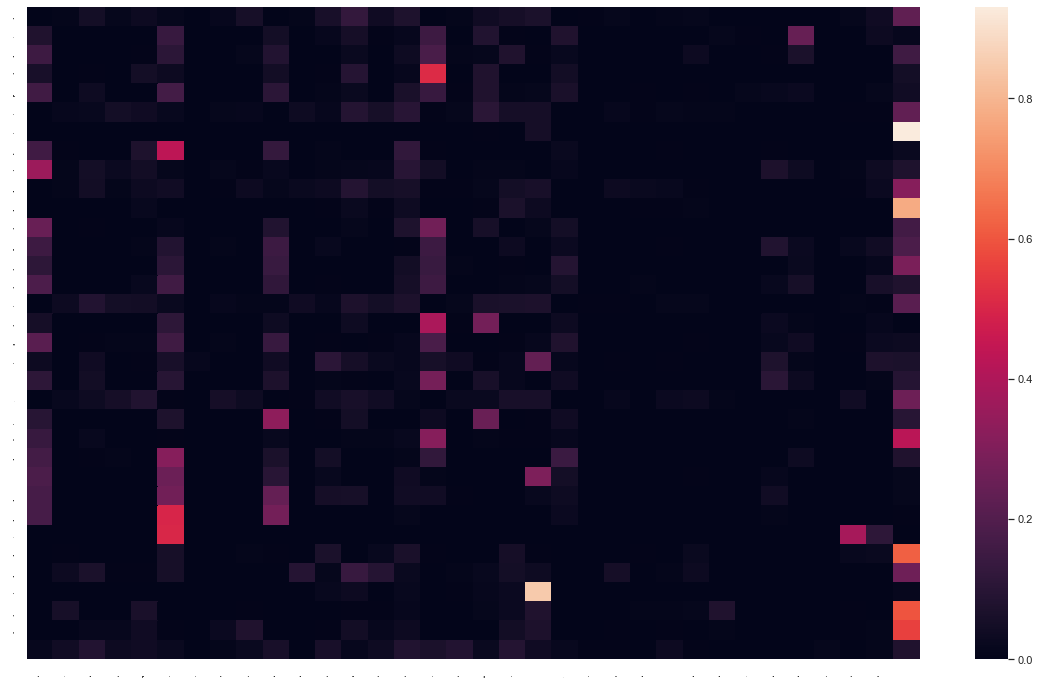

In [38]:
plt.figure(figsize=(20,12))
sns.heatmap(df)
plt.show()

Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [66]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъьыэюя'
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
sum_prob = 0
for c in RUSSIAN:
    for d in RUSSIAN:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end]
        if proba > 0:
         #   print(''.join(['п', c, d , 'р']), proba)
            sum_prob += proba
print("Probability:",sum_prob)            

Probability: 0.0008644965059866174


Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [175]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъьыэюя '
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

биножавен


# Прогноз с использованием HMM

In [71]:
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

In [81]:
from scipy.stats import boxcox

In [72]:
os.chdir ('E://Netology/AML/1._Лекция')

In [158]:
series = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")["Close"]


In [ ]:
values = series.values.reshape(-1,1)

In [118]:
for n in range(1, 10):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582102
2 -820.6341453620573
3 -786.8375332667729
4 -752.0201472668978
5 -737.1181111930908
6 -729.5671112589454
7 -713.7233991716981
8 -702.1057754508204
9 -690.9838068209651


Fitting a model with 1679 free scalar parameters with only 162 data points will result in a degenerate solution.


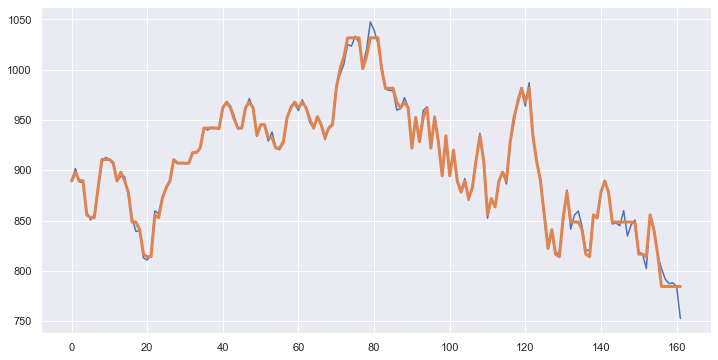

In [120]:
model = GaussianHMM(n_components=40,
                        covariance_type="full",
                        n_iter=10000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [159]:
# посмотрим что будет на стационарном ряде
series = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")["Close"]
series = boxcox(series, 0)
series = np.diff(series, 1)
values = series.reshape(-1,1)


In [160]:
for n in range(1, 10):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 384.6784489784351
2 383.3765217673009
3 381.5045328687155
4 379.3711662584231
5 377.03176753613775
6 383.4032410415315
7 383.47648922616366
8 383.5095509934485
9 383.53283858110933


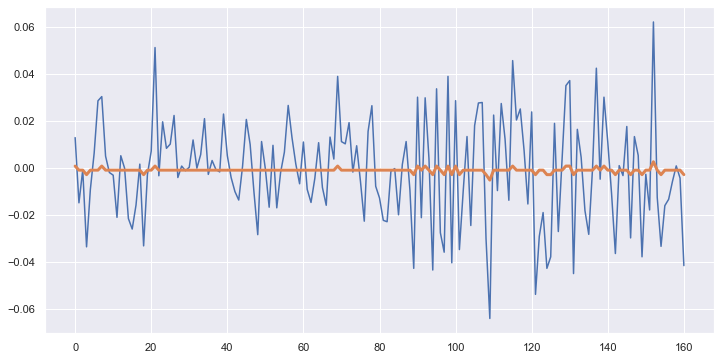

In [170]:
model = GaussianHMM(n_components=5,
                        covariance_type="diag",
                        n_iter=1000)
                       

model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [176]:
model.transmat_

array([[0.23816163, 0.16026117, 0.15803087, 0.22243691, 0.22110942],
       [0.23864737, 0.15769199, 0.15956349, 0.22387548, 0.22022167],
       [0.23678749, 0.16439179, 0.15672355, 0.21992267, 0.22217451],
       [0.23767364, 0.16168014, 0.15761826, 0.22159451, 0.22143345],
       [0.23846866, 0.15914386, 0.15850643, 0.22307239, 0.22080866]])

In [177]:
labels

array([4, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 4, 0, 4, 0, 3, 4, 0, 3, 4, 3, 4, 3, 0, 0, 0, 0, 0, 0, 3, 2,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 4, 4, 3,
       0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 1, 0,
       3, 0, 0, 0, 0, 0, 3])

In [ ]:
#?? почему на стационарном ряде такая картина?